<a href="https://colab.research.google.com/github/tangannbelang/machineLearningTimedoor/blob/main/anomalydetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [32]:
data = pd.read_csv('fraud_detection.csv')

In [33]:
data.head(5)

,transaction_id,amount,transaction_type
0,1,57.450712,purchase
1,2,47.926035,purchase
2,3,59.715328,withdrawal
3,4,72.845448,withdrawal
4,5,46.487699,transfer


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    300 non-null    int64  
 1   amount            300 non-null    float64
 2   transaction_type  300 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
data.describe()

,transaction_id,amount
count,300.000000,300.000000
mean,150.500000,55.245506
std,86.746758,30.001218
min,1.000000,1.380990
25%,75.750000,40.016445
50%,150.500000,51.475467
75%,225.250000,61.305381
max,300.000000,260.845895


In [35]:
data.isnull().sum()

,0
transaction_id,0
amount,0
transaction_type,0


In [36]:
data['transaction_type'] = data['transaction_type'].astype('category')


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   transaction_id    300 non-null    int64   
 1   amount            300 non-null    float64 
 2   transaction_type  300 non-null    category
dtypes: category(1), float64(1), int64(1)
memory usage: 5.2 KB


In [39]:
data.count()

,0
transaction_id,300
amount,300
transaction_type,300


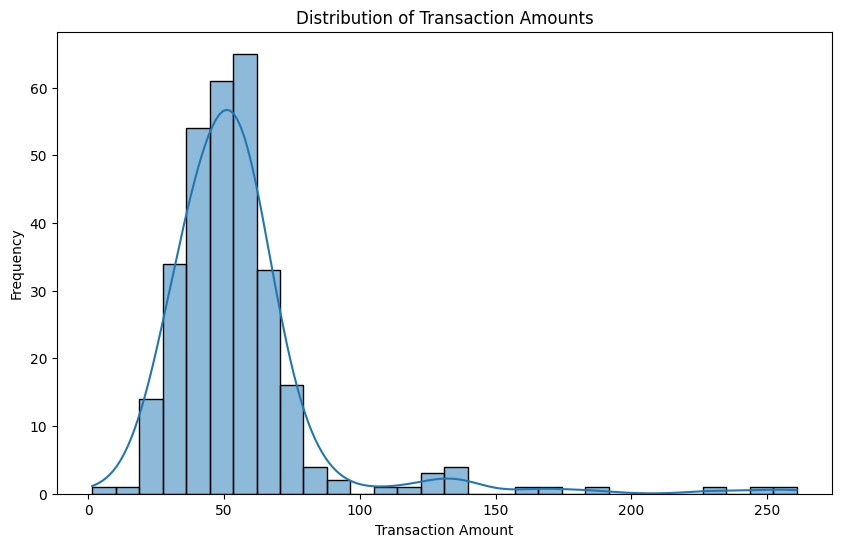

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

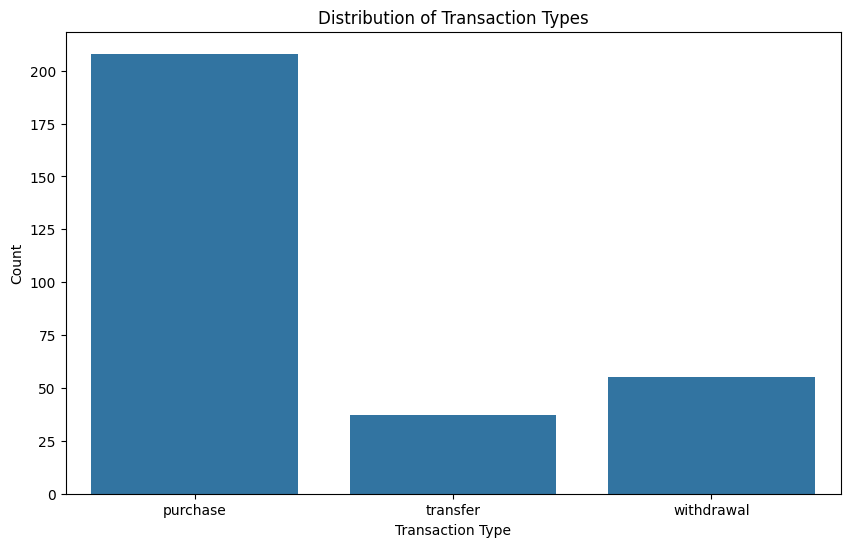

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_type', data = data)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

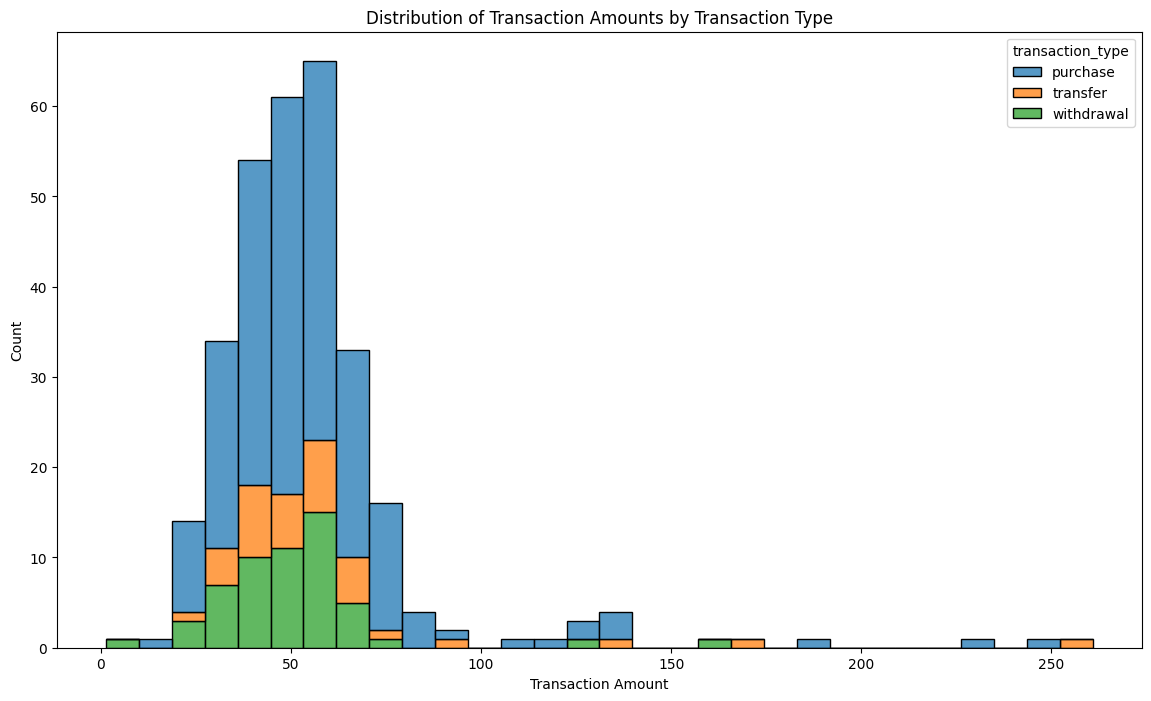

In [44]:
plt.figure(figsize=(14, 8))
sns.histplot(data=data, x='amount', hue='transaction_type', multiple='stack', bins=30)
plt.title('Distribution of Transaction Amounts by Transaction Type')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

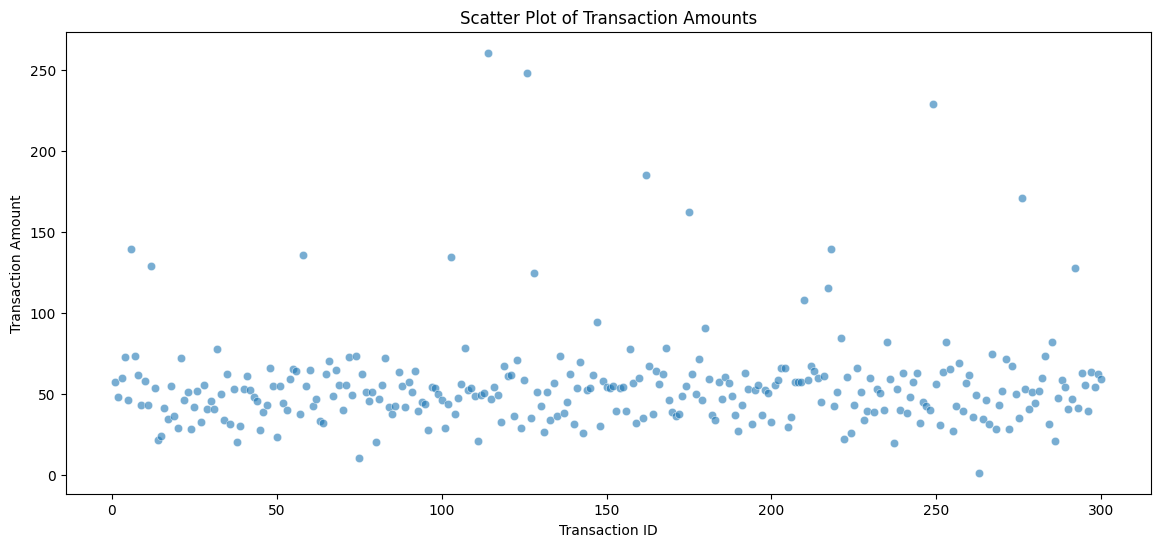

In [45]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='transaction_id', y='amount', data=data, alpha=0.6)
plt.title('Scatter Plot of Transaction Amounts')
plt.xlabel('Transaction ID')
plt.ylabel('Transaction Amount')
plt.show()

In [47]:
from sklearn.ensemble import IsolationForest
X = data[['amount']]
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

IsolationForest(contamination=0.05, random_state=42)

In [48]:
X = data[['amount']]
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

IsolationForest(contamination=0.05, random_state=42)

In [50]:
data['anomaly'] = model.predict(X)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})
data

,transaction_id,amount,transaction_type,anomaly
0,1,57.450712,purchase,0
1,2,47.926035,purchase,0
2,3,59.715328,withdrawal,0
3,4,72.845448,withdrawal,0
4,5,46.487699,transfer,0
...,...,...,...,...
295,296,39.606356,purchase,0
296,297,63.493998,purchase,0
297,298,54.609493,purchase,0
298,299,62.192932,transfer,0


In [51]:
data['anomaly'].value_counts()


,count
anomaly,
0,285
1,15


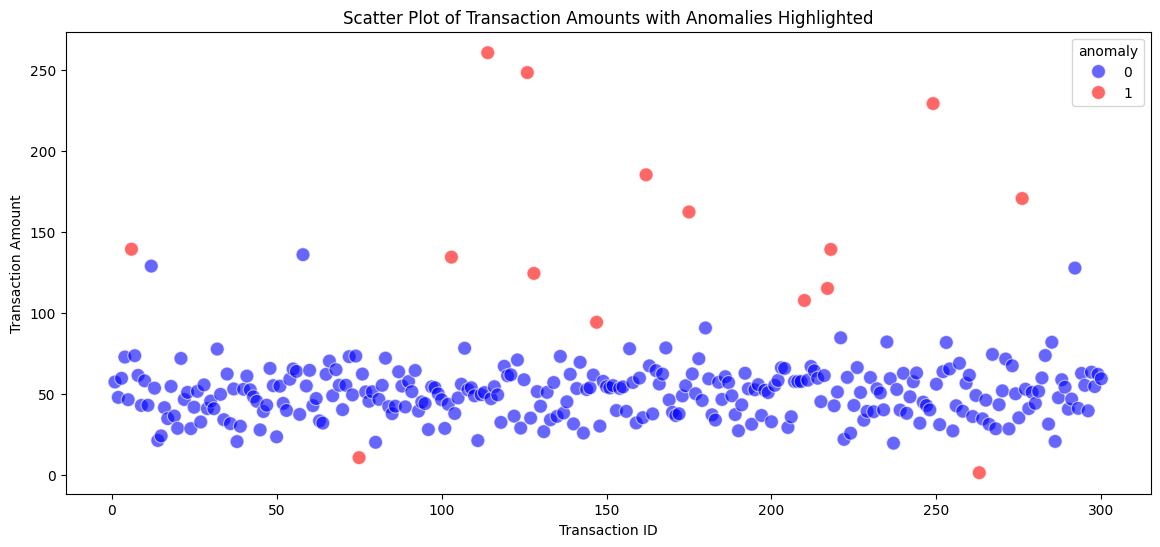

In [52]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='transaction_id', y='amount', data=data, hue='anomaly', palette={0: 'blue', 1: 'red'}, s=100, alpha=0.6)
plt.title('Scatter Plot of Transaction Amounts with Anomalies Highlighted')
plt.xlabel('Transaction ID')
plt.ylabel('Transaction Amount')
plt.show()

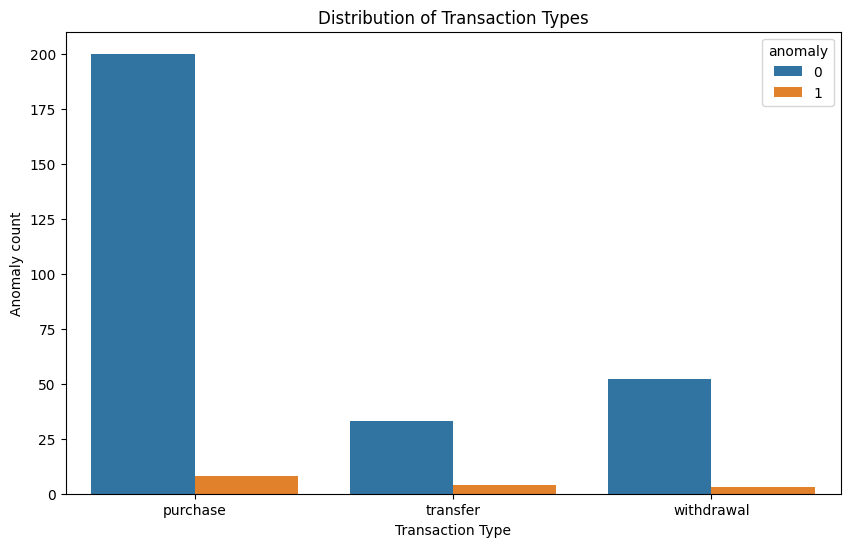

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_type',hue='anomaly',data = data)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Anomaly count')
plt.show()